# Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [70]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [71]:
df.head() #to display first 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [72]:
df.tail() #to display last 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# Data Preprocessing

In [73]:
df.shape #to display the rows and columns of dataset

(100000, 9)

In [74]:
df.isnull().sum() #to count the number of missing (NaN or null) values in each column of a Dataset.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [75]:
df.info() #to provide a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [76]:
df = df.astype({'age': int}) #to change the 'age' column from object type to integer data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


In [77]:
#encoding categorical variables with nominal values into numerical values.
map_name={'Male':1,'Female':2,'Other':3} 
df['gender']=df['gender'].map(map_name)
print(df)

       gender  age  hypertension  heart_disease smoking_history    bmi  \
0           2   80             0              1           never  25.19   
1           2   54             0              0         No Info  27.32   
2           1   28             0              0           never  27.32   
3           2   36             0              0         current  23.45   
4           1   76             1              1         current  20.14   
...       ...  ...           ...            ...             ...    ...   
99995       2   80             0              0         No Info  27.32   
99996       2    2             0              0         No Info  17.37   
99997       1   66             0              0          former  27.83   
99998       2   24             0              0           never  35.42   
99999       2   57             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1      

In [78]:
# to encode the "smoking_history" column in a DataFrame (df) into numerical values as:
# No Info=0, current=1, ever=2, former=3, never=4, not current=5

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
labels = encoder.fit_transform(df.smoking_history)
df['encoder_smoking_history'] = labels
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
0,2,80,0,1,never,25.19,6.6,140,0,4
1,2,54,0,0,No Info,27.32,6.6,80,0,0
2,1,28,0,0,never,27.32,5.7,158,0,4
3,2,36,0,0,current,23.45,5.0,155,0,1
4,1,76,1,1,current,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,2,80,0,0,No Info,27.32,6.2,90,0,0
99996,2,2,0,0,No Info,17.37,6.5,100,0,0
99997,1,66,0,0,former,27.83,5.7,155,0,3
99998,2,24,0,0,never,35.42,4.0,100,0,4


In [79]:
df2 = df.drop(['smoking_history'], axis=1) #removing the original 'smoking_history'
print(df2)

       gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0           2   80             0              1  25.19          6.6   
1           2   54             0              0  27.32          6.6   
2           1   28             0              0  27.32          5.7   
3           2   36             0              0  23.45          5.0   
4           1   76             1              1  20.14          4.8   
...       ...  ...           ...            ...    ...          ...   
99995       2   80             0              0  27.32          6.2   
99996       2    2             0              0  17.37          6.5   
99997       1   66             0              0  27.83          5.7   
99998       2   24             0              0  35.42          4.0   
99999       2   57             0              0  22.43          6.6   

       blood_glucose_level  diabetes  encoder_smoking_history  
0                      140         0                        4  
1                  

In [124]:
df2['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [127]:
negative = df2[df2.diabetes == 0]
positive = df2[df2.diabetes == 1]
print(negative.shape)
print(positive.shape)


(91500, 9)
(8500, 9)


# Under-sampling

In [132]:
negative_sample = negative.sample(n=8500)
negative_sample.shape

(8500, 9)

In [134]:
df3 = pd.concat([negative_sample, positive], axis = 0)
df3.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
94119,2,34,0,0,37.04,6.1,155,0,4
95394,2,47,0,0,30.67,6.0,155,0,0
54926,2,21,0,0,22.24,6.2,145,0,4
19988,2,14,0,0,23.42,4.0,90,0,4
76807,2,20,0,0,25.52,4.5,130,0,0


In [136]:
df3['diabetes'].value_counts()

diabetes
0    8500
1    8500
Name: count, dtype: int64

# Understanding Dataset

In [142]:
df2.describe() # to generate various summary statistics of the numerical columns in a DataFrame.

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585880,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,2.179650
std,0.492937,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,1.889659
min,1.000000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,3.000000
75%,2.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,4.000000
max,3.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,5.000000


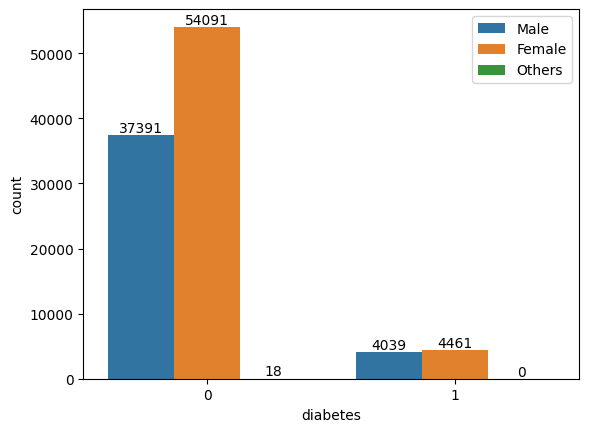

In [141]:
# to create a countplot with Seaborn and label the bars with counts 
gen=sns.countplot(x='diabetes',data=df2,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars)

plt.legend(["Male", "Female" , "Others"],  loc ="upper right")

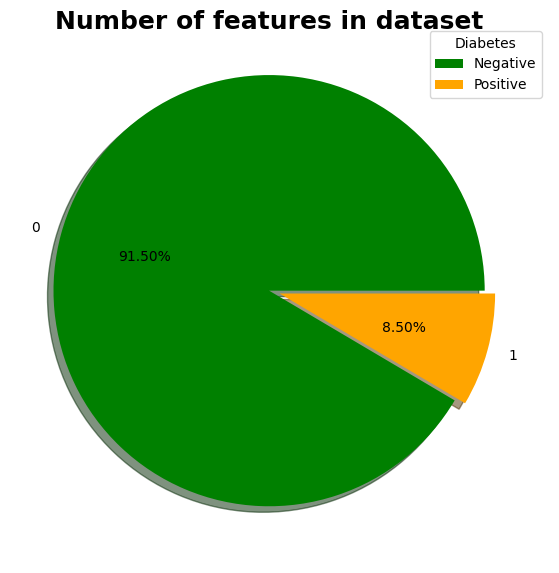

In [140]:
# to create a pie chart to visualize the distribution of diabetes labels (0 for negative and 1 for positive)using Matplotlib.
labels = [0, 1]
size = df2['diabetes'].value_counts()
colors = [ 'green', 'orange']
explode = [0.05, 0]
plt.figure(figsize=(8,7))
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.suptitle("Number of features in dataset", y=0.9, size=18,weight="bold")
plt.legend(["Negative", "Positive"],  title="Diabetes")
plt.show()

# Exploratory Data Analysis (EDA) to check the correlation between features.

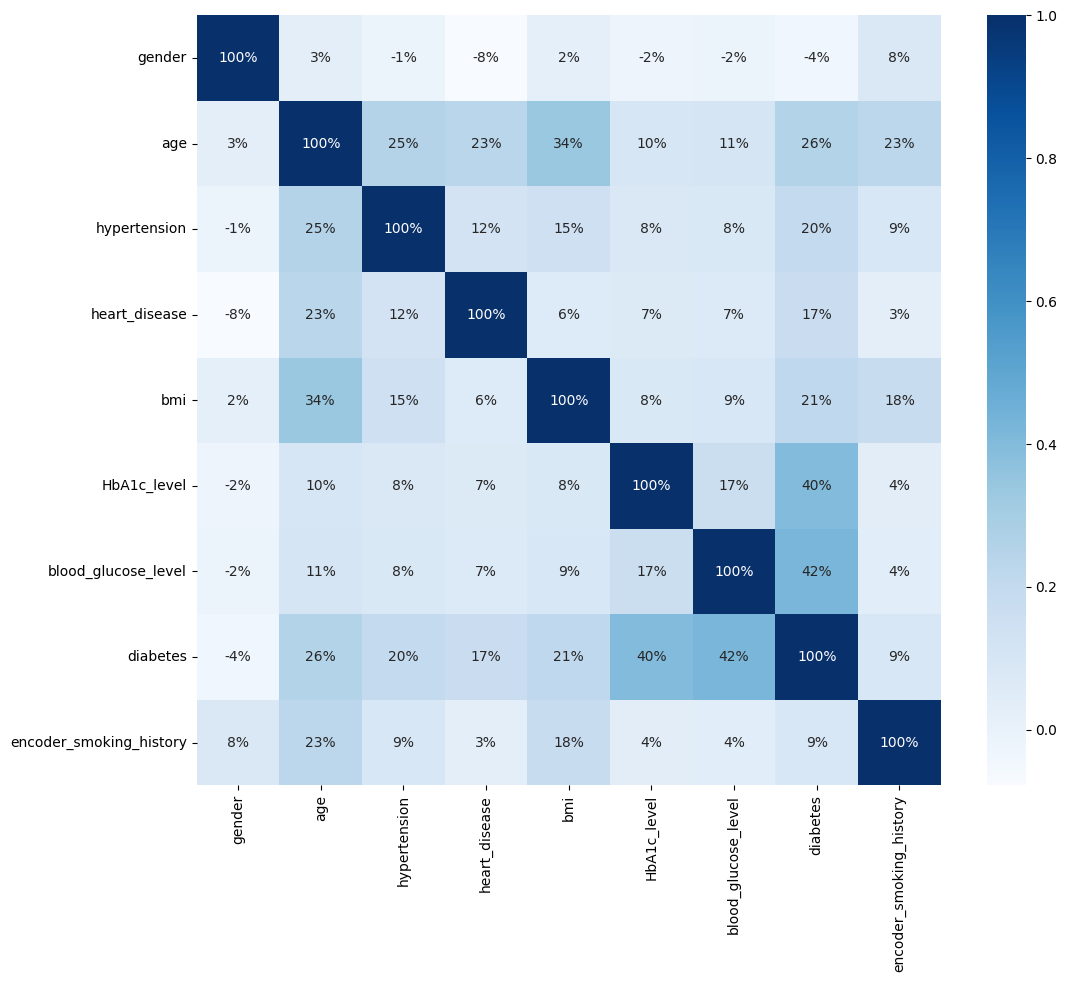

In [144]:
# creating a heatmap of the correlation matrix using Seaborn and Matplotlib.
axis = plt.figure(figsize=(12,10))
sns.heatmap(df2.corr() , annot= True , cmap = "Blues" , fmt=".0%")
plt.show()

# Feature Scaling

In [145]:
# StandardScaler standardize feature ensuring they have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df3.drop("diabetes" , axis=1))
X= scaler.transform(df3.drop("diabetes" , axis=1))
Y= df3["diabetes"]

In [148]:
# splitting dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.10 , random_state=0)

# Classification

In [150]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [151]:
# evaluating different ML models and store their accuracy scores and names in a list

acc=[]
model_name=['Logistic Regression','Decision Tree','Perceptron','Random Forest','K Nearest Neighbor', 'Naive Bayes', 'Voting Classifier']

# Logistic Regression

In [152]:
# creating LogisticRegression model having specific parameters :
# multinomial: handle multiple class prediction problems
# saga: Stochastic Average Gradient Descent,iteratively update model weights during training.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [153]:
# to make predictions on the test dataset
y_pred=model.predict(X_test)

In [154]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_lr=accuracy_score(Y_test,y_pred)
acc.append(acc_lr)
acc_lr

0.8929411764705882

In [155]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[761  80]
 [102 757]]


# Decision Tree Classifier

In [156]:
# creating DecisionTreeClassifier having parameter: 'gini' measures impurity by Gini index, splite nodes to minimize class impurity 

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=1000)
clf.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=1000)

In [157]:
# to make predictions on the test dataset
y_pred=clf.predict(X_test)

In [158]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[762  79]
 [100 759]]


In [159]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_decisionT=accuracy_score(Y_test,y_pred)
acc.append(acc_decisionT)
acc_decisionT

0.8947058823529411

# Perceptron

In [160]:
#  creating Perceptron Model
from sklearn.linear_model import Perceptron
clf3=Perceptron()
clf3.fit(X_train, Y_train.values.ravel())

Perceptron()

In [161]:
# to make predictions on the test dataset
y_pred=clf3.predict(X_test)

In [162]:
#  to compute the confusion matrix 
confusion_matrix(Y_test,y_pred)

array([[746,  95],
       [155, 704]], dtype=int64)

In [163]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_per=accuracy_score(Y_test,y_pred)
acc.append(acc_per)
acc_per

0.8529411764705882

# Random Forest Classifier

In [164]:
# creating random forest classifier model consist of 20 decision trees(n_estimators) and measure of impurity in dataset(gini). 

from sklearn.ensemble import RandomForestClassifier
cl_random=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=1000)
cl_random.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=1000, n_estimators=20)

In [165]:
# to make predictions on the test dataset
y_pred=cl_random.predict(X_test)

In [166]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[771  70]
 [ 90 769]]


In [167]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_rfc=accuracy_score(Y_test,y_pred)
acc.append(acc_rfc)
acc_rfc

0.9058823529411765

# K Nearest Neighbors

In [168]:
# creating a k nearsest neighbors model such that the number of neighbors to consider when making predictions is k = 5.

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train.values.ravel())

KNeighborsClassifier()

In [169]:
# to make the predictions
y_pred=knn.predict(X_test)

In [170]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[743  98]
 [ 93 766]]


In [171]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_knn=accuracy_score(Y_test,y_pred)
acc.append(acc_knn)
acc_knn

0.8876470588235295

# Naive Bayes Classifier

In [172]:
# creating a Gaussian Naive Bayes Classifier model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train.values.ravel())

GaussianNB()

In [173]:
# to make the predictions
y_pred=nb.predict(X_test)

In [174]:
print(confusion_matrix(Y_test,y_pred))

[[762  79]
 [201 658]]


In [175]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_nb=accuracy_score(Y_test,y_pred)
acc.append(acc_nb)
acc_nb

0.8352941176470589

# Enemble Learning: Voting Classifier

In [176]:
# create an ensemble model that combines the predictions of several individual classifiers(Random Forest, Decision Tree, Naive Bayes, K Nearest Neighbors, Perceptron, Logistic Regression)
# such that the class label with the most votes will be the final prediction (voting='hard')

from sklearn.ensemble import VotingClassifier
classifier=VotingClassifier(estimators=[('Random Forest',cl_random),('Decision Tree',clf),('Naive Bayes Classifier',nb),('K Nearest Neighbors',knn),('Perceptron',clf3),("Logistic Regression",model )], voting='hard',weights=[1,1,1,1,1,1])
classifier.fit(X_train,Y_train.values.ravel())

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=1000,
                                                     n_estimators=20)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=1000)),
                             ('Naive Bayes Classifier', GaussianNB()),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Perceptron', Perceptron()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 solver='saga'))],
                 weights=[1, 1, 1, 1, 1, 1])

In [177]:
# to make the predictions
y_pred=classifier.predict(X_test)

In [178]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[792  49]
 [132 727]]


In [179]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_vc=accuracy_score(Y_test,y_pred)
acc.append(acc_vc)
acc_vc

0.8935294117647059

# Comparison Of Classification Models Based On Their Accuracy Scores

In [180]:
print(acc)

[0.8929411764705882, 0.8947058823529411, 0.8529411764705882, 0.9058823529411765, 0.8876470588235295, 0.8352941176470589, 0.8935294117647059]


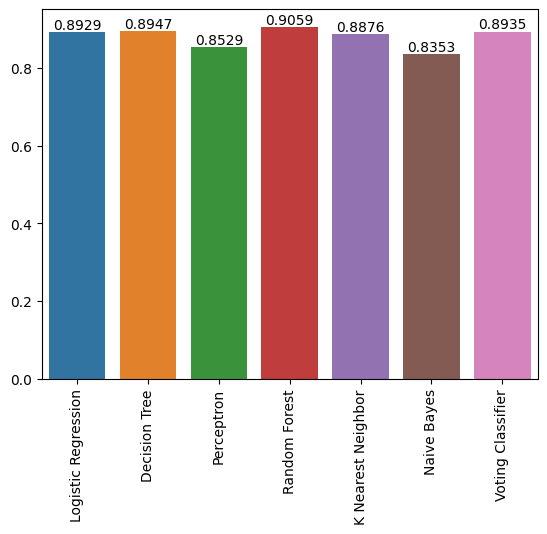

In [193]:
# to create a bar plot to visualize the accuracy scores of different machine learning models
ax = sns.barplot(x=model_name, y=acc)
for i, height in enumerate(acc):
    ax.text(i, height, f'{acc[i]:.4f}',ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

# Making a prediction from the model

In [194]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(never))

input_data=(2,	44	,0	,0	,	19.31,	6.5,	200,4)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

X= scaler.transform(input_data_reshaped)
print(X)

prediction = classifier.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[  2.    44.     0.     0.    19.31   6.5  200.     4.  ]]
[[ 0.88598234 -0.29322235 -0.42289055 -0.31176741 -1.35367287  0.25894086
   0.64562523  0.86156065]]
[0]
The person is not diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [183]:

input_data=(2,	80,	0	,1	,	25.19	,6.6,	140,		4)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

X= scaler.transform(input_data_reshaped)
print(X)
prediction = classifier.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[  2.    80.     0.     1.    25.19   6.6  140.     4.  ]]
[[ 0.88598234  1.37464091 -0.42289055  3.20751939 -0.56662515  0.33719298
  -0.40196749  0.86156065]]
[1]
The person is diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
